In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing
from statsmodels.tsa.seasonal import STL
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [2]:
coc_sale_df = pd.read_excel('CocaCola_Sales_Rawdata.xlsx',sheet_name='Sheet1')

In [3]:
coc_sale_df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [4]:
coc_sale_df['report_date'] = (pd.to_datetime([f'19{x[-2:]}{x[:2]}' for x in coc_sale_df['Quarter']]) + pd.DateOffset(months =3))

In [5]:
coc_sale_df

,Quarter,Sales,report_date
0,Q1_86,1734.827000,1986-04-01
1,Q2_86,2244.960999,1986-07-01
2,Q3_86,2533.804993,1986-10-01
3,Q4_86,2154.962997,1987-01-01
4,Q1_87,1547.818996,1987-04-01
5,Q2_87,2104.411995,1987-07-01
6,Q3_87,2014.362999,1987-10-01
7,Q4_87,1991.746998,1988-01-01
8,Q1_88,1869.049999,1988-04-01
9,Q2_88,2313.631996,1988-07-01


In [6]:
print(f"Date range of Sales Available from {coc_sale_df.loc[:,'report_date'][0]} to {coc_sale_df.loc[:,'report_date'][41]}")

Date range of Sales Available from 1986-04-01 00:00:00 to 1996-07-01 00:00:00


In [7]:
coc_sale_df.index = coc_sale_df['report_date']
coc_sale_df.drop(['report_date','Quarter'],axis=1,inplace=True)
coc_sale_df.head()

,Sales
report_date,
1986-04-01,1734.827000
1986-07-01,2244.960999
1986-10-01,2533.804993
1987-01-01,2154.962997
1987-04-01,1547.818996


In [8]:
coc_sale_df.tail()

,Sales
report_date,
1995-07-01,4936.0
1995-10-01,4895.0
1996-01-01,4333.0
1996-04-01,4194.0
1996-07-01,5253.0


In [9]:
coc_sale_df.shape

(42, 1)

### EDA 

In [10]:
coc_sale_df.isnull().sum()

Sales    0
dtype: int64

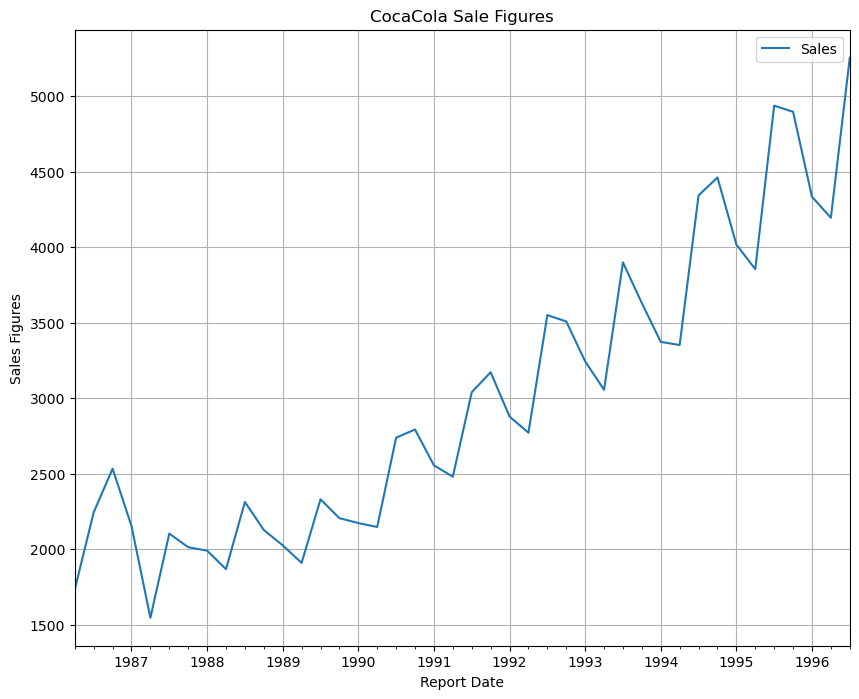

In [11]:
coc_sale_df.plot(figsize=(10,8))
plt.title("CocaCola Sale Figures")
plt.xlabel("Report Date")
plt.ylabel("Sales Figures")
plt.grid()

In [12]:
print(round(coc_sale_df.describe(),2))

         Sales
count    42.00
mean   2994.35
std     977.93
min    1547.82
25%    2159.71
50%    2782.38
75%    3609.25
max    5253.00


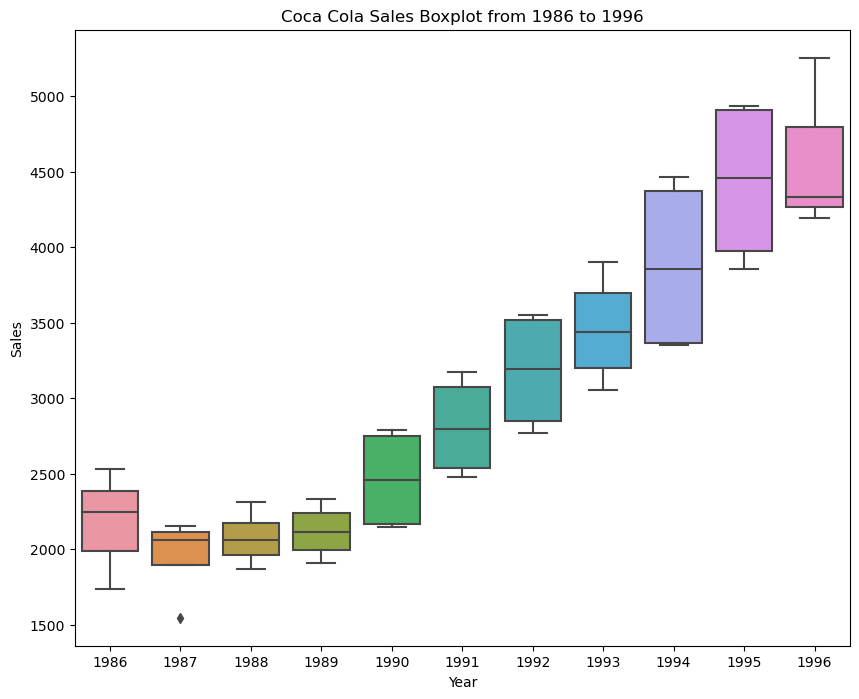

In [13]:
_,ax = plt.subplots(figsize=(10,8))
sns.boxplot(x=coc_sale_df.index.year, y = coc_sale_df.Sales,ax=ax)
plt.title("Coca Cola Sales Boxplot from 1986 to 1996")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.show()

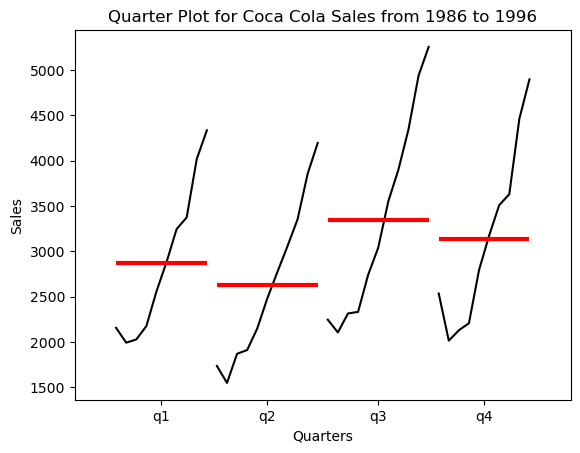

In [14]:
from statsmodels.graphics.tsaplots import quarter_plot
quarter_plot(coc_sale_df)
plt.title("Quarter Plot for Coca Cola Sales from 1986 to 1996")
plt.xlabel("Quarters")
plt.ylabel("Sales")
plt.show()

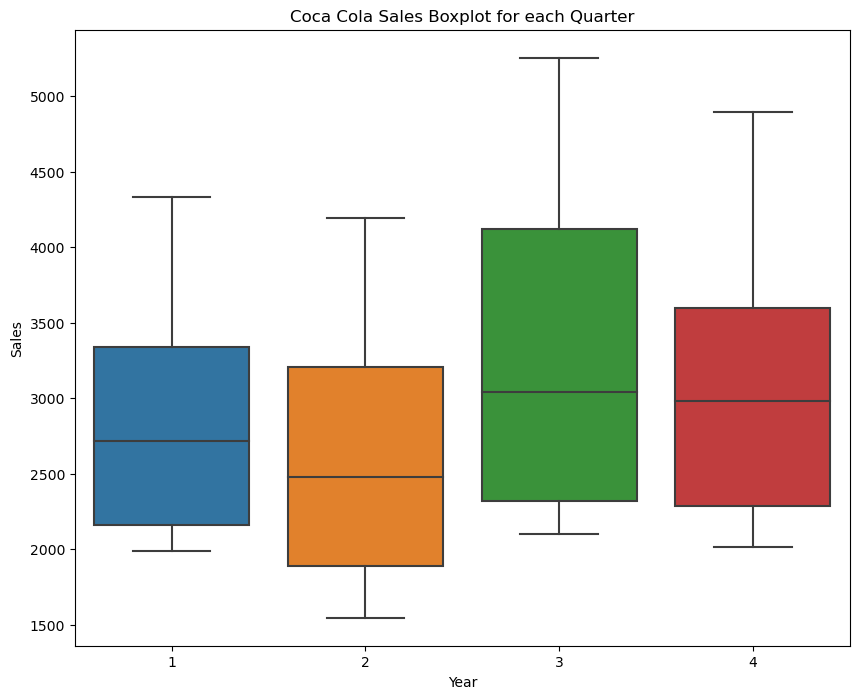

In [15]:
_,ax = plt.subplots(figsize=(10,8))
sns.boxplot(x=coc_sale_df.index.quarter, y = coc_sale_df.Sales,ax=ax)
plt.title("Coca Cola Sales Boxplot for each Quarter")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.show()

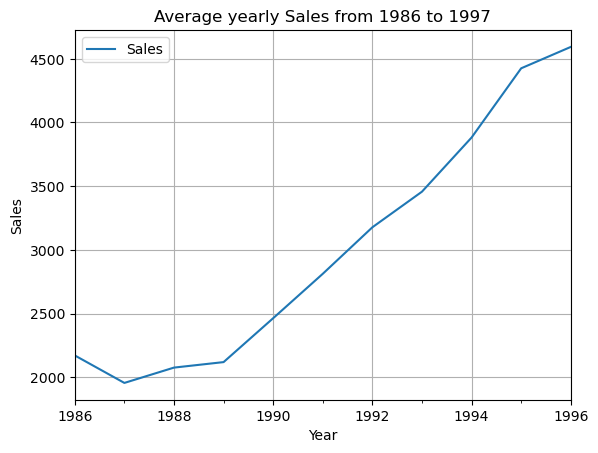

In [16]:
df_yearly_sale = coc_sale_df.resample('A').mean()
df_yearly_sale.plot()
plt.title("Average yearly Sales from 1986 to 1997")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.grid()

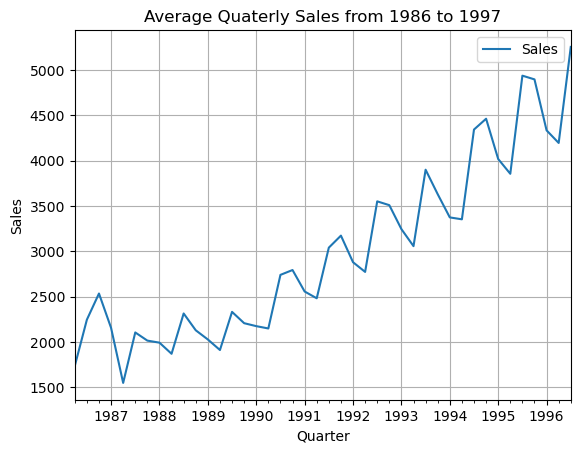

In [17]:
df_quaterly_sale = coc_sale_df.resample('Q').mean()
df_quaterly_sale.plot()
plt.title("Average Quaterly Sales from 1986 to 1997")
plt.xlabel("Quarter")
plt.ylabel("Sales")
plt.grid()

## ETS(Error-Trend-Seasonality) decomposition of the data

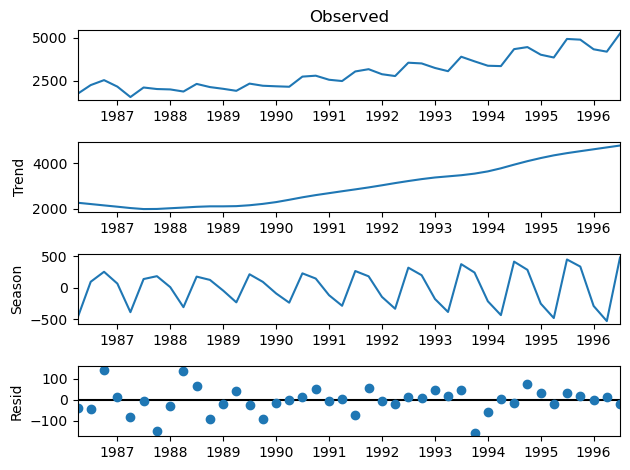

In [18]:
df = STL(coc_sale_df).fit()
df.plot()
plt.show()

## Pre-Processing of Data

In [19]:
train_data = coc_sale_df[:38]
train_data.index = pd.date_range(start='1986-04-01', periods=len(train_data), freq='QS')
train_data.tail()

,Sales
1994-07-01,4342.0
1994-10-01,4461.0
1995-01-01,4017.0
1995-04-01,3854.0
1995-07-01,4936.0


In [20]:
test_data = coc_sale_df[38:]
test_data

,Sales
report_date,
1995-10-01,4895.0
1996-01-01,4333.0
1996-04-01,4194.0
1996-07-01,5253.0


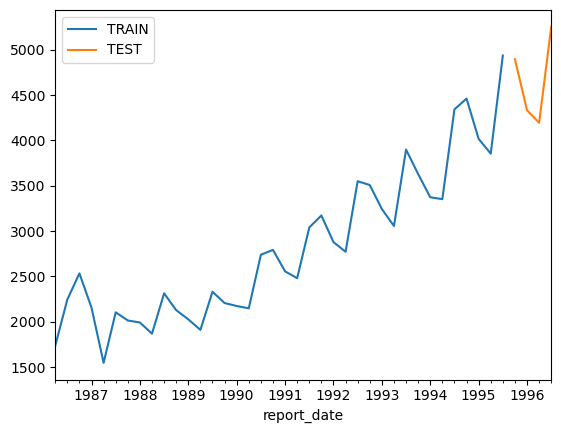

In [21]:
train_data['Sales'].plot(legend=True,label='TRAIN')
test_data['Sales'].plot(legend=True,label='TEST')
plt.show()

In [22]:
train_len = len(train_data)
test_len = len(test_data)

## Build Models

## 1. Simple Exponential Smoothening

In [23]:
ses_model = SimpleExpSmoothing(train_data).fit(smoothing_level=0.2)
res = ses_model.forecast(test_len)

In [24]:
predicted_sales = test_data.copy()
predicted_sales['SES'] = res.values

In [25]:
predicted_sales.head()

,Sales,SES
report_date,,
1995-10-01,4895.0,4020.476386
1996-01-01,4333.0,4020.476386
1996-04-01,4194.0,4020.476386
1996-07-01,5253.0,4020.476386


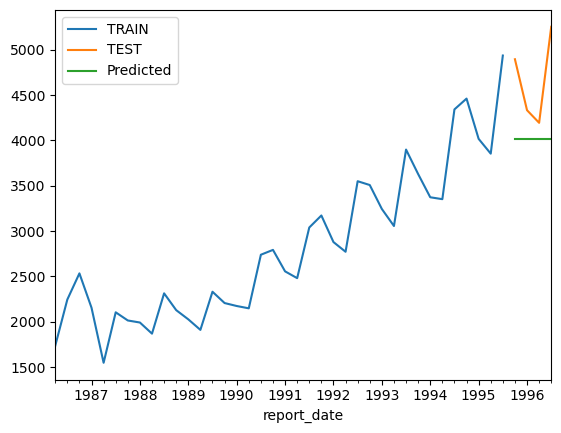

In [26]:
train_data['Sales'].plot(legend=True,label='TRAIN')
test_data['Sales'].plot(legend=True,label='TEST')
predicted_sales['SES'].plot(legend=True,label='Predicted')
plt.show()

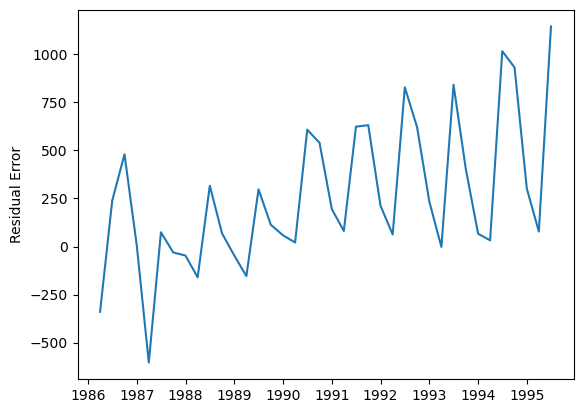

In [27]:
plt.plot(ses_model.resid)
plt.ylabel("Residual Error")
plt.show()

## Metrics of model

In [28]:
model_residuals = pd.DataFrame(index = ['MSE','RMSE','MAE','MAPE'])

In [29]:
mse = round(mean_squared_error(test_data['Sales'],predicted_sales['SES']),3)
rmse = round(np.sqrt(mse),3)
mae = round(mean_absolute_error(test_data['Sales'],predicted_sales['SES']),3)
mape = round(mean_absolute_percentage_error(test_data['Sales'],predicted_sales['SES']),3)
model_residuals['SES'] = [mse,rmse,mae,mape]
model_residuals

,SES
MSE,602921.866
RMSE,776.480
MAE,648.274
MAPE,0.132


## 2. Double Exponential Smoothening
#### a. Addition Trend

In [30]:
des_model = ExponentialSmoothing(train_data,trend='add').fit()
res = des_model.forecast(test_len)

In [31]:
predicted_sales['DES_add'] = res.values

In [32]:
predicted_sales.head()

,Sales,SES,DES_add
report_date,,,
1995-10-01,4895.0,4020.476386,4523.214166
1996-01-01,4333.0,4020.476386,4643.052569
1996-04-01,4194.0,4020.476386,4762.890972
1996-07-01,5253.0,4020.476386,4882.729375


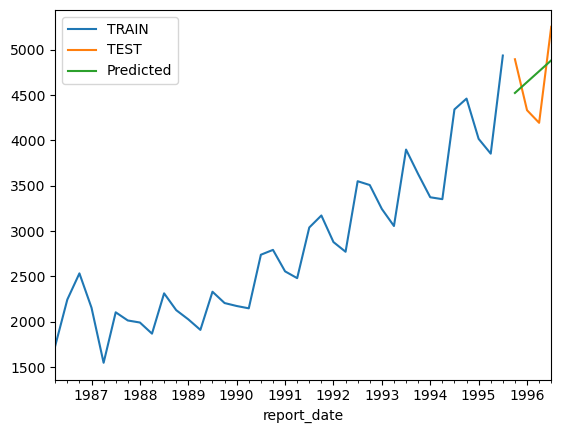

In [33]:
train_data['Sales'].plot(legend=True,label='TRAIN')
test_data['Sales'].plot(legend=True,label='TEST')
predicted_sales['DES_add'].plot(legend=True,label='Predicted')
plt.show()

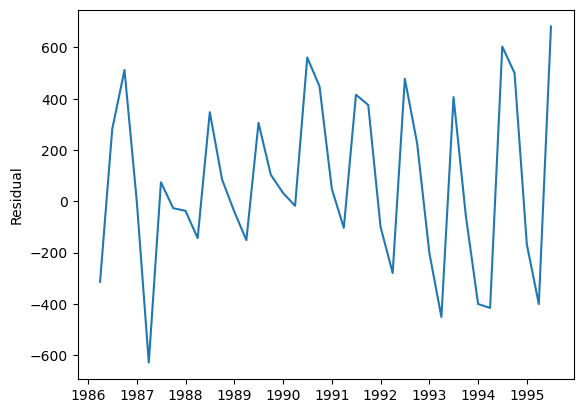

In [34]:
plt.plot(des_model.resid)
plt.ylabel('Residual')
plt.show()

In [35]:
mse = round(mean_squared_error(test_data['Sales'],predicted_sales['DES_add']),3)
rmse = round(np.sqrt(mse),3)
mae = round(mean_absolute_error(test_data['Sales'],predicted_sales['DES_add']),3)
mape = round(mean_absolute_percentage_error(test_data['Sales'],predicted_sales['DES_add']),3)
model_residuals['DES_add'] = [mse,rmse,mae,mape]
model_residuals

,SES,DES_add
MSE,602921.866,173773.644
RMSE,776.480,416.862
MAE,648.274,405.250
MAPE,0.132,0.088


#### b. Multiplicative Trend

In [36]:
des_model_mul = ExponentialSmoothing(train_data,trend='mul').fit()
res = des_model_mul.forecast(test_len)

In [37]:
predicted_sales['DES_mul'] = res.values
predicted_sales.head()

,Sales,SES,DES_add,DES_mul
report_date,,,,
1995-10-01,4895.0,4020.476386,4523.214166,4623.151289
1996-01-01,4333.0,4020.476386,4643.052569,4770.174939
1996-04-01,4194.0,4020.476386,4762.890972,4921.874177
1996-07-01,5253.0,4020.476386,4882.729375,5078.397695


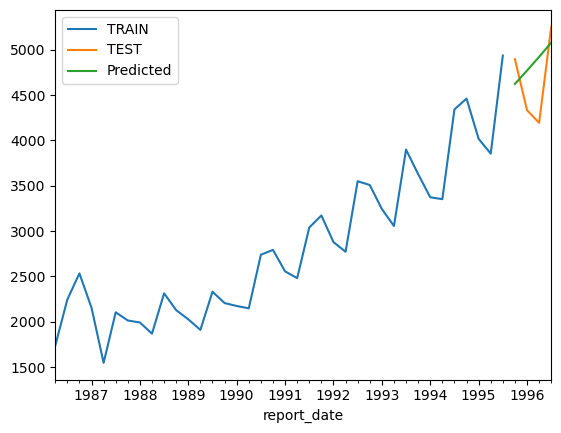

In [38]:
train_data['Sales'].plot(legend=True,label='TRAIN')
test_data['Sales'].plot(legend=True,label='TEST')
predicted_sales['DES_mul'].plot(legend=True,label='Predicted')
plt.show()

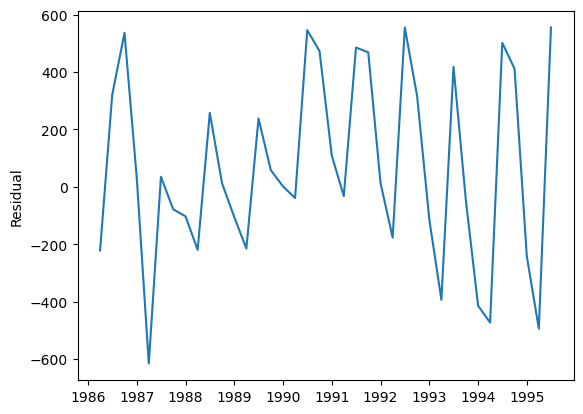

In [39]:
plt.plot(des_model_mul.resid)
plt.ylabel('Residual')
plt.show()

In [40]:
mse = round(mean_squared_error(test_data['Sales'],predicted_sales['DES_mul']),3)
rmse = round(np.sqrt(mse),3)
mae = round(mean_absolute_error(test_data['Sales'],predicted_sales['DES_mul']),3)
mape = round(mean_absolute_percentage_error(test_data['Sales'],predicted_sales['DES_mul']),3)
model_residuals['DES_mul'] = [mse,rmse,mae,mape]
model_residuals

,SES,DES_add,DES_mul
MSE,602921.866,173773.644,206327.608
RMSE,776.480,416.862,454.233
MAE,648.274,405.250,402.875
MAPE,0.132,0.088,0.091


## Triple Exponential Smoothening
+ a. Additive Trend and Additive Seasonality

In [41]:
tes_model_add = ExponentialSmoothing(train_data,trend='add',seasonal='add').fit()
res = tes_model_add.forecast(test_len)

In [42]:
predicted_sales['TES_add'] = res.values
predicted_sales.head()

,Sales,SES,DES_add,DES_mul,TES_add
report_date,,,,,
1995-10-01,4895.0,4020.476386,4523.214166,4623.151289,4832.361160
1996-01-01,4333.0,4020.476386,4643.052569,4770.174939,4393.577349
1996-04-01,4194.0,4020.476386,4762.890972,4921.874177,4297.214882
1996-07-01,5253.0,4020.476386,4882.729375,5078.397695,5298.729943


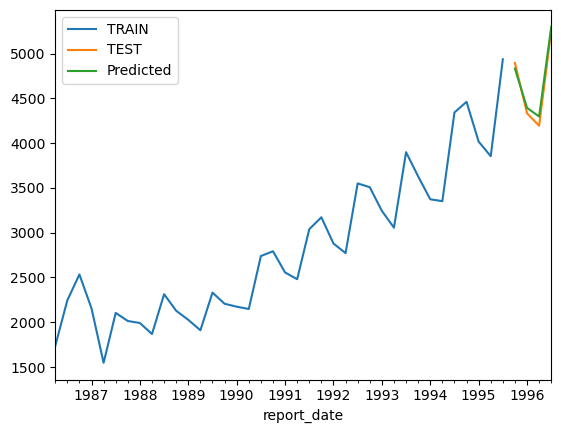

In [43]:
train_data['Sales'].plot(legend=True,label='TRAIN')
test_data['Sales'].plot(legend=True,label='TEST')
predicted_sales['TES_add'].plot(legend=True,label='Predicted')
plt.show()

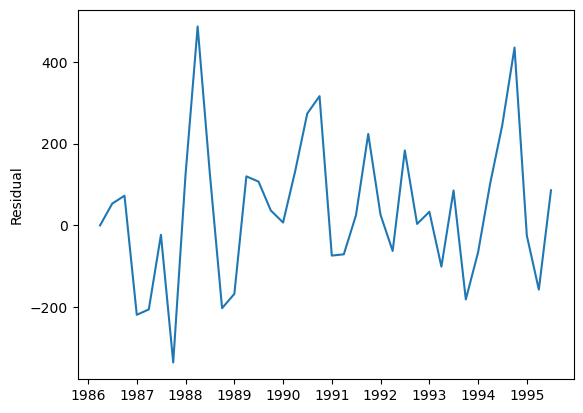

In [44]:
plt.plot(tes_model_add.resid)
plt.ylabel('Residual')
plt.show()

In [45]:
mse = round(mean_squared_error(test_data['Sales'],predicted_sales['TES_add']),3)
rmse = round(np.sqrt(mse),3)
mae = round(mean_absolute_error(test_data['Sales'],predicted_sales['TES_add']),3)
mape = round(mean_absolute_percentage_error(test_data['Sales'],predicted_sales['TES_add']),3)
model_residuals['TES_add'] = [mse,rmse,mae,mape]
model_residuals

,SES,DES_add,DES_mul,TES_add
MSE,602921.866,173773.644,206327.608,5084.445
RMSE,776.480,416.862,454.233,71.305
MAE,648.274,405.250,402.875,68.040
MAPE,0.132,0.088,0.091,0.015


#### b. Additive Trend and Multiplicative Seasonality

In [46]:
tes_add_mul = ExponentialSmoothing(train_data,trend='add',seasonal='mul').fit()
res = tes_add_mul.forecast(test_len)

In [47]:
predicted_sales['TES_add_mul'] = res.values
predicted_sales.head()

,Sales,SES,DES_add,DES_mul,TES_add,TES_add_mul
report_date,,,,,,
1995-10-01,4895.0,4020.476386,4523.214166,4623.151289,4832.361160,4918.952092
1996-01-01,4333.0,4020.476386,4643.052569,4770.174939,4393.577349,4533.897004
1996-04-01,4194.0,4020.476386,4762.890972,4921.874177,4297.214882,4285.189658
1996-07-01,5253.0,4020.476386,4882.729375,5078.397695,5298.729943,5465.039571


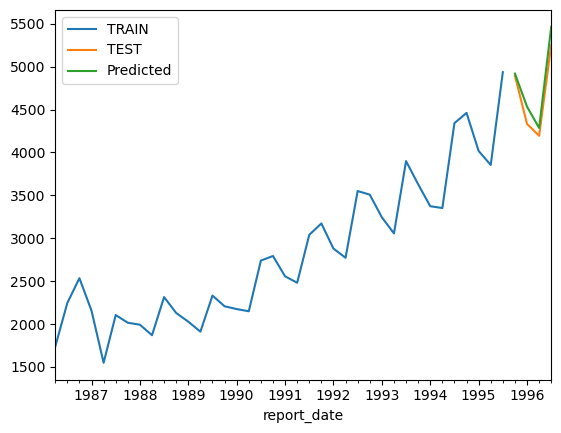

In [48]:
train_data['Sales'].plot(legend=True,label='TRAIN')
test_data['Sales'].plot(legend=True,label='TEST')
predicted_sales['TES_add_mul'].plot(legend=True,label='Predicted')
plt.show()

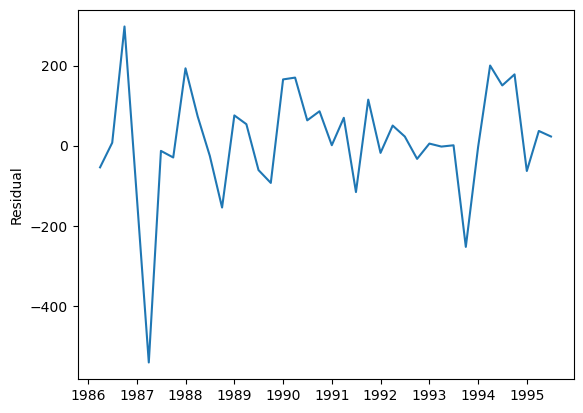

In [49]:
plt.plot(tes_add_mul.resid)
plt.ylabel('Residual')
plt.show()

In [50]:
mse = round(mean_squared_error(test_data['Sales'],predicted_sales['TES_add_mul']),3)
rmse = round(np.sqrt(mse),3)
mae = round(mean_absolute_error(test_data['Sales'],predicted_sales['TES_add_mul']),3)
mape = round(mean_absolute_percentage_error(test_data['Sales'],predicted_sales['TES_add_mul']),3)
model_residuals['TES_add_mul'] = [mse,rmse,mae,mape]
model_residuals

,SES,DES_add,DES_mul,TES_add,TES_add_mul
MSE,602921.866,173773.644,206327.608,5084.445,23552.411
RMSE,776.480,416.862,454.233,71.305,153.468
MAE,648.274,405.250,402.875,68.040,132.020
MAPE,0.132,0.088,0.091,0.015,0.028


#### c. Multiplicative Trend and Additive seasonality

In [51]:
tes_mul_add = ExponentialSmoothing(train_data,trend='mul',seasonal='add').fit()
res = tes_mul_add.forecast(test_len)

In [52]:
predicted_sales['TES_mul_add'] = res.values
predicted_sales.head()

,Sales,SES,DES_add,DES_mul,TES_add,TES_add_mul,TES_mul_add
report_date,,,,,,,
1995-10-01,4895.0,4020.476386,4523.214166,4623.151289,4832.361160,4918.952092,4817.021273
1996-01-01,4333.0,4020.476386,4643.052569,4770.174939,4393.577349,4533.897004,4523.009549
1996-04-01,4194.0,4020.476386,4762.890972,4921.874177,4297.214882,4285.189658,4466.547858
1996-07-01,5253.0,4020.476386,4882.729375,5078.397695,5298.729943,5465.039571,5379.516585


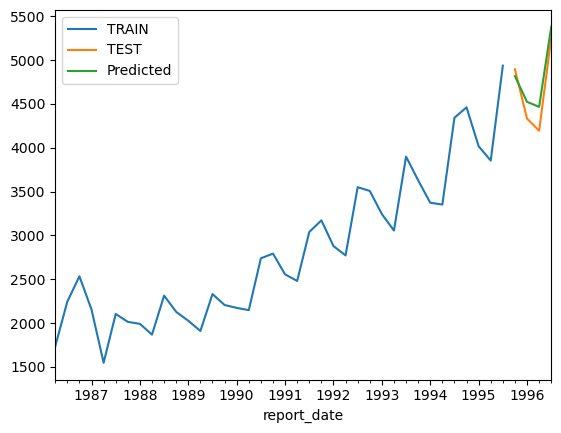

In [53]:
train_data['Sales'].plot(legend=True,label='TRAIN')
test_data['Sales'].plot(legend=True,label='TEST')
predicted_sales['TES_mul_add'].plot(legend=True,label='Predicted')
plt.show()

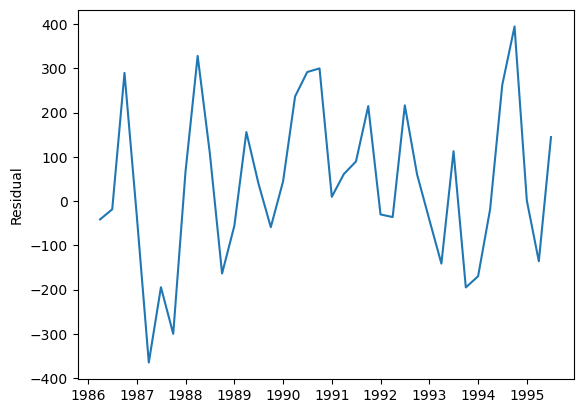

In [54]:
plt.plot(tes_mul_add.resid)
plt.ylabel('Residual')
plt.show()

In [55]:
mse = round(mean_squared_error(test_data['Sales'],predicted_sales['TES_mul_add']),3)
rmse = round(np.sqrt(mse),3)
mae = round(mean_absolute_error(test_data['Sales'],predicted_sales['TES_mul_add']),3)
mape = round(mean_absolute_percentage_error(test_data['Sales'],predicted_sales['TES_mul_add']),3)
model_residuals['TES_mul_add'] = [mse,rmse,mae,mape]
model_residuals

,SES,DES_add,DES_mul,TES_add,TES_add_mul,TES_mul_add
MSE,602921.866,173773.644,206327.608,5084.445,23552.411,33118.273
RMSE,776.480,416.862,454.233,71.305,153.468,181.984
MAE,648.274,405.250,402.875,68.040,132.020,166.763
MAPE,0.132,0.088,0.091,0.015,0.028,0.037


#### d. Multiplicative Trend and Multiplicative seasonality

In [56]:
tes_mul_mul = ExponentialSmoothing(train_data,trend='mul',seasonal='mul').fit()
res = tes_mul_mul.forecast(test_len)

In [57]:
predicted_sales['TES_mul_mul'] = res.values
predicted_sales.head()

,Sales,SES,DES_add,DES_mul,TES_add,TES_add_mul,TES_mul_add,TES_mul_mul
report_date,,,,,,,,
1995-10-01,4895.0,4020.476386,4523.214166,4623.151289,4832.361160,4918.952092,4817.021273,4927.436336
1996-01-01,4333.0,4020.476386,4643.052569,4770.174939,4393.577349,4533.897004,4523.009549,4569.412347
1996-04-01,4194.0,4020.476386,4762.890972,4921.874177,4297.214882,4285.189658,4466.547858,4319.067247
1996-07-01,5253.0,4020.476386,4882.729375,5078.397695,5298.729943,5465.039571,5379.516585,5519.628242


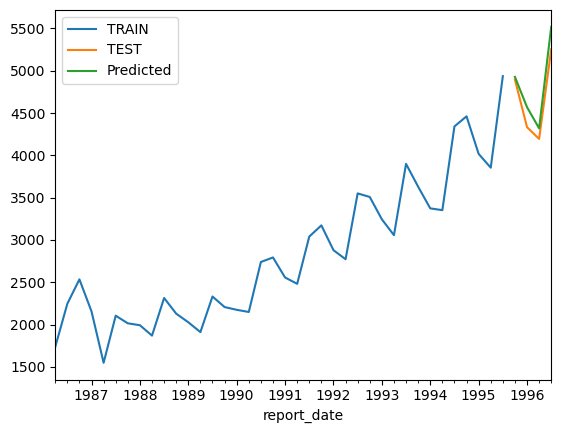

In [58]:
train_data['Sales'].plot(legend=True,label='TRAIN')
test_data['Sales'].plot(legend=True,label='TEST')
predicted_sales['TES_mul_mul'].plot(legend=True,label='Predicted')
plt.show()

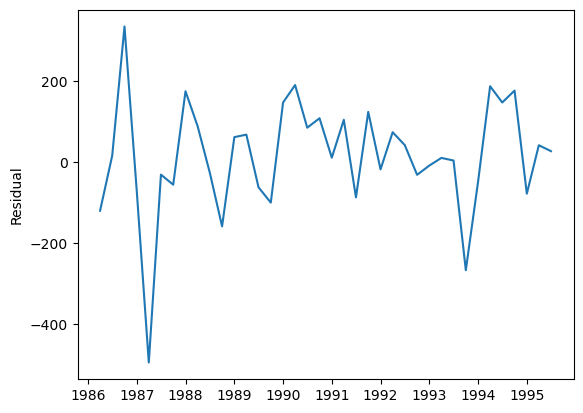

In [59]:
plt.plot(tes_mul_mul.resid)
plt.ylabel('Residual')
plt.show()

In [60]:
mse = round(mean_squared_error(test_data['Sales'],predicted_sales['TES_mul_mul']),3)
rmse = round(np.sqrt(mse),3)
mae = round(mean_absolute_error(test_data['Sales'],predicted_sales['TES_mul_mul']),3)
mape = round(mean_absolute_percentage_error(test_data['Sales'],predicted_sales['TES_mul_mul']),3)
model_residuals['TES_mul_mul'] = [mse,rmse,mae,mape]
model_residuals

,SES,DES_add,DES_mul,TES_add,TES_add_mul,TES_mul_add,TES_mul_mul
MSE,602921.866,173773.644,206327.608,5084.445,23552.411,33118.273,35918.837
RMSE,776.480,416.862,454.233,71.305,153.468,181.984,189.523
MAE,648.274,405.250,402.875,68.040,132.020,166.763,165.136
MAPE,0.132,0.088,0.091,0.015,0.028,0.037,0.035


## Triple exponential smoothening model with additive trend as well as additive seasonality provides least possible error, visually it appears to replicate the test data.

## Further, Triple exponential smoothening model with additive trend and multiplicative seasonality provides second least possible error, I shall also build model on it.

#### Hence we rebuild the model with Triple exponential smothening with additive trend and additive seasonlity, for the entire data. Further it should also be noted that it can be used to predict the sales figure of next four quaters.

In [62]:
final_model_add = ExponentialSmoothing(coc_sale_df,trend='add',seasonal='add').fit()
res1=final_model_add.forecast(len(test_data))

C:\Users\radha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


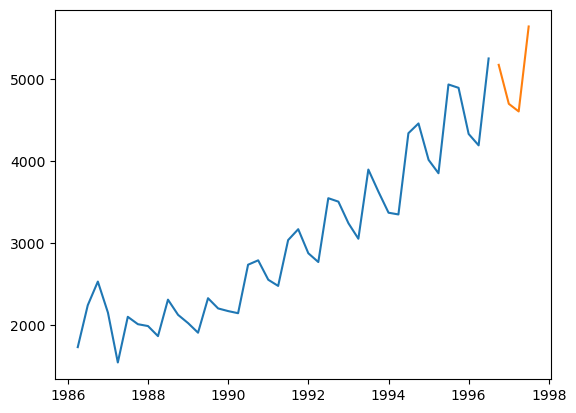

In [63]:
plt.plot(coc_sale_df)
plt.plot(res1)
plt.show()

In [65]:
final_model_add.resid.mean()

32.190383293485574

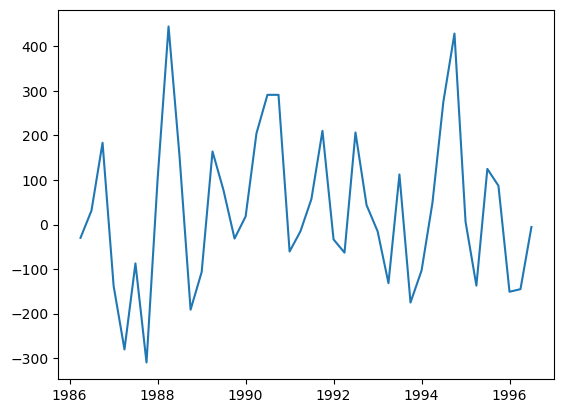

In [66]:
plt.plot(final_model_add.resid)
plt.show()

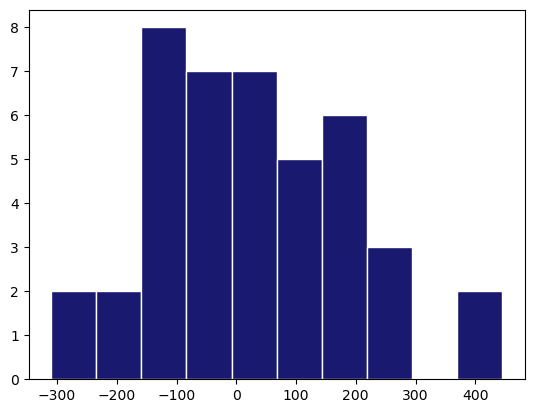

In [67]:
plt.hist(final_model_add.resid,color='midnightblue',edgecolor='w')
plt.show()

In [68]:
final_model_mul = ExponentialSmoothing(coc_sale_df,trend='add',seasonal='mul').fit()
res_2=final_model_mul.forecast(len(test_data))

C:\Users\radha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


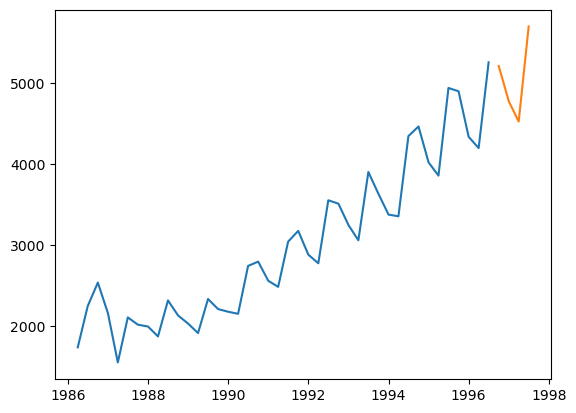

In [69]:
plt.plot(coc_sale_df)
plt.plot(res_2)
plt.show()

In [70]:
final_model_mul.resid.mean()

9.910643976583023

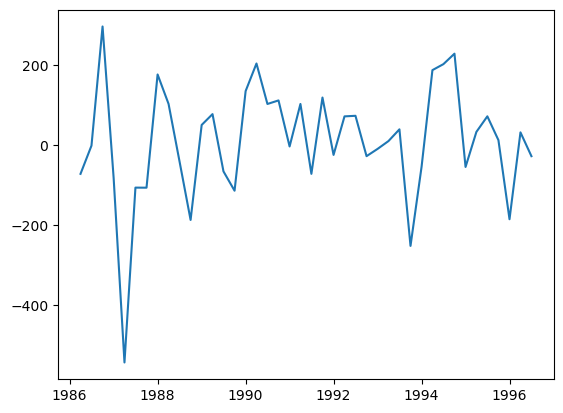

In [71]:
plt.plot(final_model_mul.resid)
plt.show()

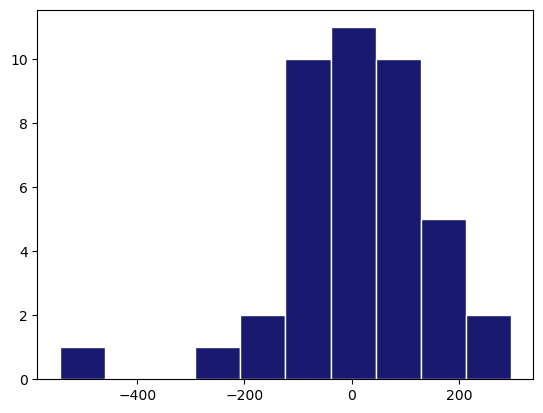

In [72]:
plt.hist(final_model_mul.resid,color='midnightblue',edgecolor='w')
plt.show()